# TP2 : Linear regression

In [18]:
#naming the file
fn1 = "Lauria"
ln1 = "Sun"
filename = "_".join(map(lambda s: s.strip().lower(),
                    ["SD-TSIA204_lab2", ln1, fn1])) + ".ipynb"

***
# Imports

In [19]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install autopep8 

Note: you may need to restart the kernel to use updated packages.


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample

***
# Preprocess the data

## Question 1

In [22]:
#(a) Set the random seed to 0
np.random.seed(0)

In [23]:
#(b) Load the data 
df = pd.read_csv('meatspec.csv', sep = ";", header = 0)

In [24]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,fat
0,2.61776,2.61814,2.61859,2.61912,2.61981,2.62071,2.62186,2.62334,2.62511,2.62722,...,2.98145,2.96072,2.94013,2.91978,2.89966,2.87964,2.85960,2.83940,2.81920,22.5
1,2.83454,2.83871,2.84283,2.84705,2.85138,2.85587,2.86060,2.86566,2.87093,2.87661,...,3.29186,3.27921,3.26655,3.25369,3.24045,3.22659,3.21181,3.19600,3.17942,40.1
2,2.58284,2.58458,2.58629,2.58808,2.58996,2.59192,2.59401,2.59627,2.59873,2.60131,...,2.68951,2.67009,2.65112,2.63262,2.61461,2.59718,2.58034,2.56404,2.54816,8.4
3,2.82286,2.82460,2.82630,2.82814,2.83001,2.83192,2.83392,2.83606,2.83842,2.84097,...,2.97367,2.94951,2.92576,2.90251,2.87988,2.85794,2.83672,2.81617,2.79622,5.9
4,2.78813,2.78989,2.79167,2.79350,2.79538,2.79746,2.79984,2.80254,2.80553,2.80890,...,3.30025,3.27907,3.25831,3.23784,3.21765,3.19766,3.17770,3.15770,3.13753,25.5


In [25]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,fat
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,...,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,2.808561,2.811137,2.813727,2.816363,2.819098,2.821983,2.825064,2.828375,2.831943,2.835813,...,3.178262,3.158254,3.138534,3.119104,3.099971,3.081070,3.062290,3.043548,3.024895,18.142326
std,0.410793,0.413352,0.415906,0.418465,0.421040,0.423635,0.426245,0.428866,0.431510,0.434195,...,0.541957,0.541776,0.541519,0.541135,0.540563,0.539730,0.538586,0.537108,0.535354,12.740297
min,2.066420,2.065830,2.065180,2.064650,2.064170,2.063730,2.063400,2.063140,2.063010,2.063170,...,2.339720,2.320940,2.300430,2.280180,2.260580,2.241710,2.223520,2.206020,2.189130,0.900000
25%,2.512265,2.513260,2.514210,2.515330,2.516775,2.518240,2.518305,2.518605,2.519185,2.521480,...,2.781960,2.763715,2.741450,2.722130,2.702475,2.682635,2.664900,2.647370,2.628230,7.300000
50%,2.753600,2.755180,2.756680,2.758240,2.759860,2.761610,2.763550,2.765680,2.768660,2.770720,...,3.079400,3.058200,3.036290,3.014480,2.993020,2.971850,2.953740,2.935140,2.915640,14.000000
75%,3.006155,3.010470,3.014840,3.019260,3.025895,3.032780,3.039780,3.046930,3.054310,3.061875,...,3.493140,3.477830,3.462340,3.446320,3.429490,3.411360,3.393100,3.375965,3.358195,28.000000
max,4.237280,4.247210,4.257370,4.267730,4.278470,4.289680,4.301330,4.313310,4.325870,4.339270,...,5.128190,5.111870,5.095180,5.077600,5.058950,5.038260,5.015710,4.991070,4.965430,49.100000


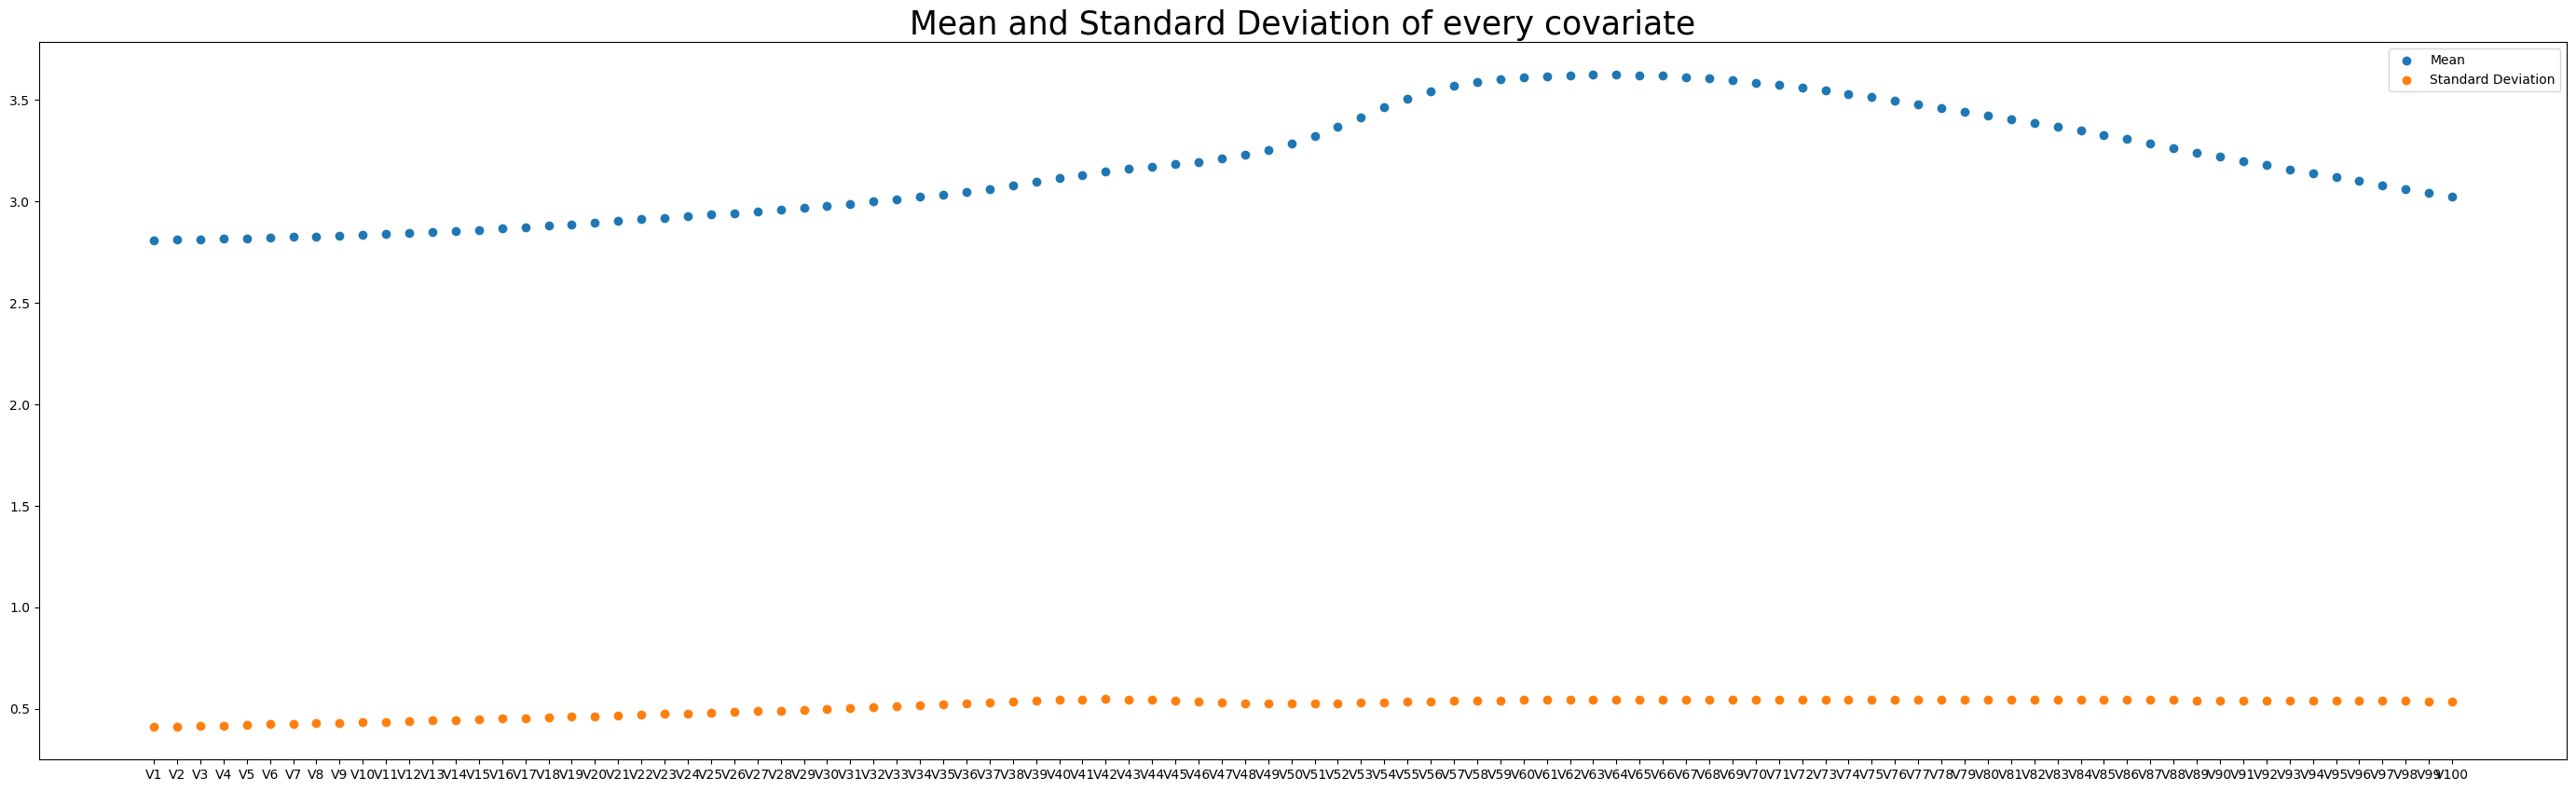

In [26]:
#Print the mean, and standard deviation of every covariate
n, p = df.shape
fig = plt.figure(figsize = (35, 10))
plt.scatter(df.iloc[:,:p-1].columns, df.iloc[:,:p-1].describe()[1:2], label = "Mean")
plt.scatter(df.iloc[:,:p-1].columns, df.iloc[:,:p-1].describe()[2:3], label = "Standard Deviation")

plt.title('Mean and Standard Deviation of every covariate', size=25)
plt.legend()
plt.show()

The data is not centered, neither normalized. So we need to standardize them

In [27]:
#Create matrix X and matrix Y
n, p = df.shape
X = np.array(df.iloc[:,:p-1])
Y = np.array(df.iloc[:,-1])
print(f"The shape of X: {X.shape}\nThe shape of Y: {Y.shape}")

The shape of X: (215, 100)
The shape of Y: (215,)


In [28]:
#(c) Separate the data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
print(f"The shape of X: {X_train.shape}\nThe shape of Y: {y_train.shape}")

The shape of X: (161, 100)
The shape of Y: (161,)


In [29]:
# Standardize both the training and testing sets
Std_scaler=StandardScaler()
X_train_std = Std_scaler.fit_transform(X_train)
X_test_std = Std_scaler.transform(X_test)
y_train = Std_scaler.fit_transform(y_train.reshape(-1,1))
y_test = Std_scaler.transform(y_test.reshape(-1,1))
y_train = y_train.flatten()
y_test = y_test.flatten()

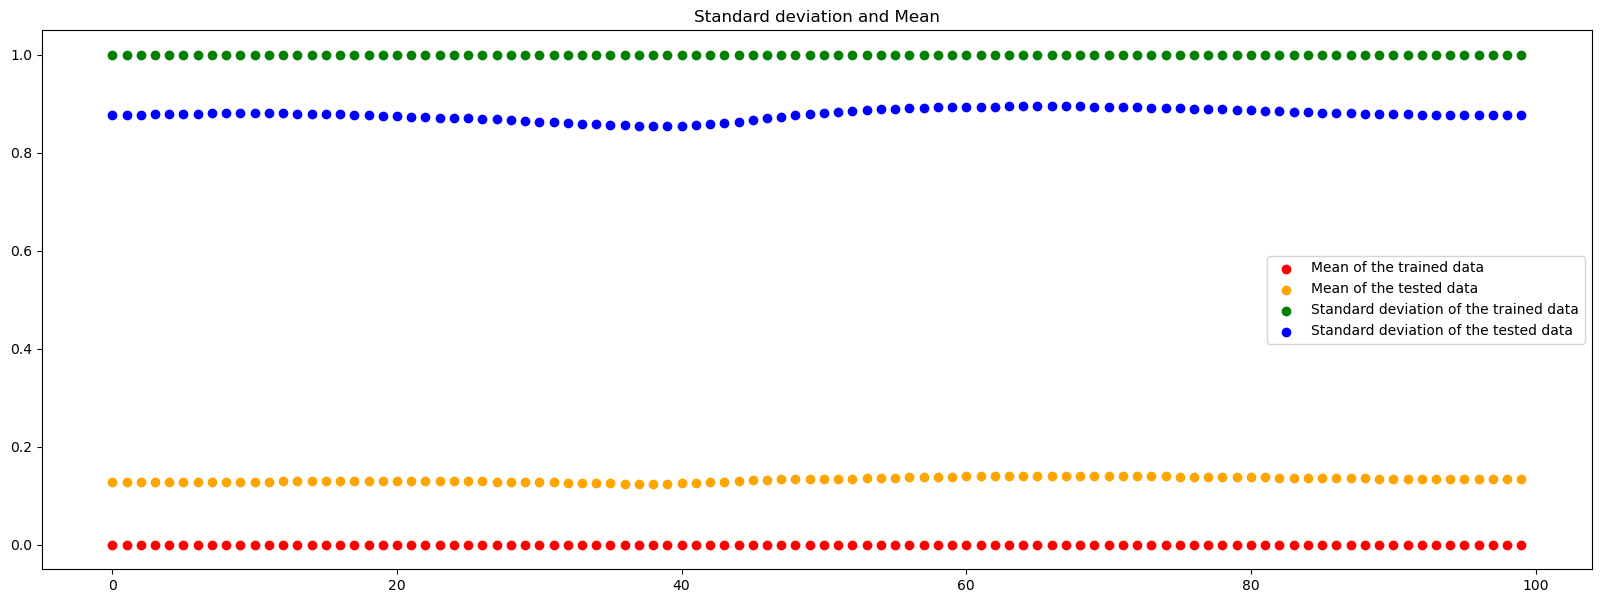

In [30]:
#(d) Need to fit the intercept?
fig = plt.figure(figsize=(20, 7))
plt.scatter(range(X_train_std.shape[1]), X_train_std.mean(axis=0), color = "red",label="Mean of the trained data")
plt.scatter(range(X_test_std.shape[1]), X_test_std.mean(axis=0), color = "orange", label="Mean of the tested data")
plt.scatter(range(X_train_std.shape[1]), X_train_std.std(axis=0), color = "green", label="Standard deviation of the trained data")
plt.scatter(range(X_test_std.shape[1]), X_test_std.std(axis=0), color = "blue", label="Standard deviation of the tested data")
plt.title('Standard deviation and Mean')
plt.legend()
plt.show()

We don't need to fit the intercept because the train data is centered. 

In [31]:
model = LinearRegression(fit_intercept=False).fit(X_train_std,y_train)
y_predicted = model.predict(X_test_std)
r2_OLS = r2_score(y_test, y_predicted)
print(f"R^2 = {r2_OLS}")

R^2 = 0.9600547777924087


In [32]:
#(e) Create a dataFrame df_coef and store the R2 coefficients of the estimated model
df_coef = pd.DataFrame()
df_coef["OLS"] = pd.Series(r2_OLS)

In [33]:
df_coef.head()

,OLS
0,0.960055


***
# Variable Selection

## Question 2

In [34]:
#Program the method of the forward variable selection

def forward_var_selection(X,Y):
    n,p = X.shape 
    S = []
    A = [i for i in range(p)]
    r = Y 
    model = LinearRegression(fit_intercept=False)
    
    while len(A) > 0: 
        list_theta_n = {}
        list_T_n = {}
        for k in A :
            if k not in S :
                Xk_tilde = X[:,k].reshape(n,1)
                
                X_k = np.concatenate((np.ones((n,1)), Xk_tilde), axis=1)

                results = model.fit(X_k,r)
                theta_n = model.coef_.T
                
                list_theta_n[k]=theta_n

                G = X_k.T @ X_k/n 
                e1 = np.zeros(G.shape[0])
                e1[0] = 1
                s_n = np.sqrt(e1@np.linalg.inv(G)@e1.reshape(G.shape[0],1))

                sigma_n = np.linalg.norm(r - X_k @ theta_n)**2 / (n-2)
                T_n = np.sqrt(n)*np.linalg.norm(theta_n, 1) / (s_n * sigma_n)
                
                list_T_n[k]=T_n
                
        k_star = max(list_T_n, key=list_T_n.get)  
        S.append(k_star)
        A.remove(k_star)
        r = r - np.concatenate((np.ones((n,1)), X[:,k_star].reshape(n,1)), axis=1)@list_theta_n[k_star]
    
    return S

In [35]:
S1 = forward_var_selection(X_train_std,y_train)

# Question 3

In [36]:
#With a p-value smaller than 0.05.
def forward_var_selection_p_value(X,Y, p_stop):
    n,p = X.shape 
    S = [] 
    A = [i for i in range(p)]
    r = Y 
    T_steps = []
    p_value_steps = []
    p_value = 0
    model = LinearRegression(fit_intercept=False)
    
    while len(A) > 0:
        list_theta_n = {}
        list_T_n = {}
        for k in A :
            if k not in S :
                Xk_tilde = X[:,k].reshape(n,1)
                X_k = np.concatenate((np.ones((n,1)), Xk_tilde), axis=1)

                results = model.fit(X_k,r)
                theta_n = model.coef_.T
                list_theta_n[k]=theta_n

                G = X_k.T @ X_k/n 
                e1 = np.zeros(G.shape[0])
                e1[0] = 1
                s_n = np.sqrt(e1@np.linalg.inv(G)@e1.reshape(G.shape[0],1))

                sigma_n = np.linalg.norm(r - X_k @ theta_n)**2 / (n-2)
                T_n = np.sqrt(n)*np.linalg.norm(theta_n, 1) / (s_n * sigma_n)
                
                list_T_n[k]=T_n

        k_star = max(list_T_n, key=list_T_n.get) 
        p_value = 2 * (1 - scipy.stats.norm.cdf(list_T_n[k_star])) 
        if p_value < p_stop:  
            S.append(k_star)
        A.remove(k_star)
        r = r - np.concatenate((np.ones((n,1)), X[:,k_star].reshape(n,1)), axis=1)@list_theta_n[k_star]
        T_steps.append(list_T_n)
        p_value_steps.append(p_value)
    
    
    return S, T_steps, p_value_steps

In [37]:
S, T_steps, p_value_steps = forward_var_selection_p_value(X_train_std,y_train, 0.05)

In [38]:
#(a) Apply the OLS of the sklearn library

FVS_X_train = X_train_std[:,sel_var]
FVS_X_test = X_test_std[:,sel_var]

model = LinearRegression(fit_intercept=False)
model.fit(FVS_X_train, y_train)

FVS_Y_predicted = model.predict(FVS_X_test)
r2_fvs = r2_score(y_test, FVS_Y_predicted)
print(f"R^2 = {r2_fvs}")

NameError: name 'sel_var' is not defined

In [ ]:
#(b) Store the R2 coefficient in df_coef
df_coef["FVS"] = pd.Series(r2_fvs)

In [ ]:
df_coef.head()

## Question 4

In [ ]:
# Using SequentialFeatureSelector on a linear regression estimator select, select the same number of variables as in the previous question.
model = LinearRegression(fit_intercept = False)
sfs = SequentialFeatureSelector(lr, k_features=len(S), forward=True, scoring='r2')
sfs.fit(X_train_std, y_train)
r2_sfs = sfs.k_score_

In [ ]:
# Store R2 coefficient 
df_coef["Sequential Feature Selector"] = pd.Series(r2_sfs)
df_sfs.head()

The two algorithms do not return the same variables because they use different methods for selecting the features : 
* OLS selects the variables based on their individual p-values, 
* SequentialFeatureSelector selects features based on their contribution to the overall performance of the model. 

***
# Ridge

## Question 5

In [ ]:
#Code your own ridge estimator using expression derived in class
def ridge_estimator(X,Y,alpha):
    n,p = X.shape
    I = np.identity(p)
    return np.linalg.inv(X.T@X+n*alpha*I)@X.T@Y

In [ ]:
#Test it for a penalty parameter α spaced evenly on a log scale 10e-9 to 10e2
alphas = np.logspace(-9,2,num=100)
ridge_estimators = [ridge_estimator(X_train_std,y_train,alpha).flatten() for alpha in alphas]

In [ ]:
#(a) Plot how the values of the coefficients change with α
fig = plt.figure(figsize=(17, 7))
plt.plot(alphas, ridge_estimators)
plt.xscale('log')
plt.title("Test of ridge_estimator for a penalty parameter α spaced evenly on a log scale 10e-9 to 10e2.")
plt.show()

In [ ]:
#(b) Plot how MSE of both the train and test sets change with α. Signal the minimum with a point.

MSE_train=[]
MSE_test=[]
for alpha in alphas : 
    y_train_pred = X_train_std@ridge_estimator(X_train_std,y_train,alpha)
    y_test_pred = X_test_std@ridge_estimator(X_train_std,y_train,alpha)
    MSE_train.append(mean_squared_error(y_train,y_pred = y_train_pred))
    MSE_test.append(mean_squared_error(y_test,y_pred = y_test_pred))
MSE_train_min = np.argmin(MSE_train)
MSE_test_min = np.argmin(MSE_test)

fig = plt.figure(figsize=(17, 7))
plt.plot(alphas[MSE_test_min], MSE_test[MSE_test_min], marker="o", color="red")
plt.plot(alphas[MSE_train_min], MSE_train[MSE_train_min], marker="o", color="blue")
plt.plot(alphas, MSE_train)
plt.plot(alphas, MSE_test)
plt.xscale('log')
plt.title("MSE_train and MSE_test")
plt.show()

In [ ]:
#(c) For the best performing value of α 
best_value_alpha = alphas[MSE_train_min]
y_best = X_train_std @ ridge_estimator(X_train_std,y_train,best_value_alpha)
r2_best = r2_score(y_train,y_best)

In [ ]:
#Store R2
df_coef["Ridge"] = pd.Series(r2_best)

In [ ]:
df_coef.head()

***
# Crossvalidation, Lasso and elastic net

## Question 6

In [ ]:
#Use the sklearn version of the Lasso. Test it for a penalty parameter α spaced evenly on a log scale 10e-5 to 10e-2.
alphas = np.logspace(-5,2,num=100)
lassos = []

for alpha in alphas : 
    model = Lasso(alpha, fit_intercept=False)
    results = model.fit(X_train_std,y_train)
    lasso_coeff = model.coef_
    lassos.append(lasso_coeff)
    
fig = plt.figure(figsize=(17, 7))
plt.plot(alphas, lassos)
plt.xscale('log')
plt.title("Test of Lasso estimator for a penalty parameter α spaced evenly on a log scale 10e-9 to 10e2.")
plt.show()

In [39]:
#(a) To avoid having warnings and error you want to decrease the parameter tol or increase max_iter. Elaborate on why these warning arise and on the solution
alphas = np.logspace(-5,2,num=100)
lassos = []
num_coef_dif_zero = []

for alpha in alphas : 
    model = Lasso(alpha, fit_intercept=False,max_iter=100000, tol=0.1)
    results = model.fit(X_train_std,y_train)
    lasso_coeff = model.coef_
    lassos.append(lasso_coeff)
    num_coef_dif_zero.append(np.count_nonzero(lasso_coeff))


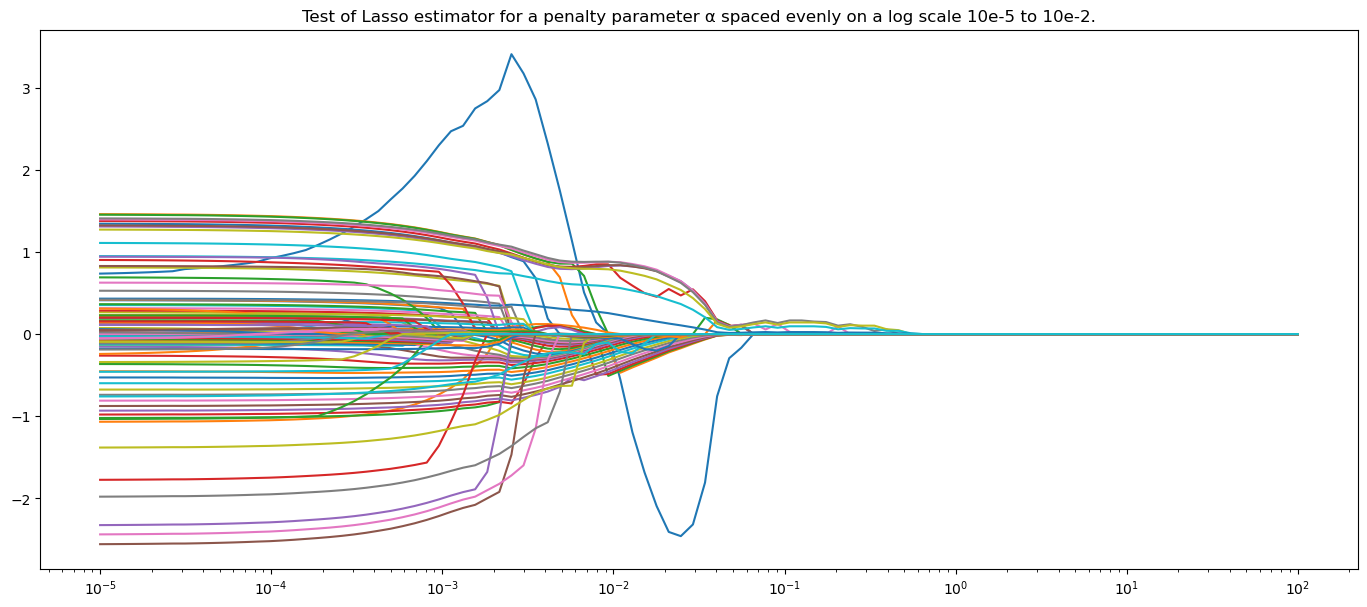

In [40]:
fig = plt.figure(figsize=(17, 7))
plt.plot(alphas, lassos)
plt.xscale('log')
plt.title("Test of Lasso estimator for a penalty parameter α spaced evenly on a log scale 10e-5 to 10e-2.")
plt.show()

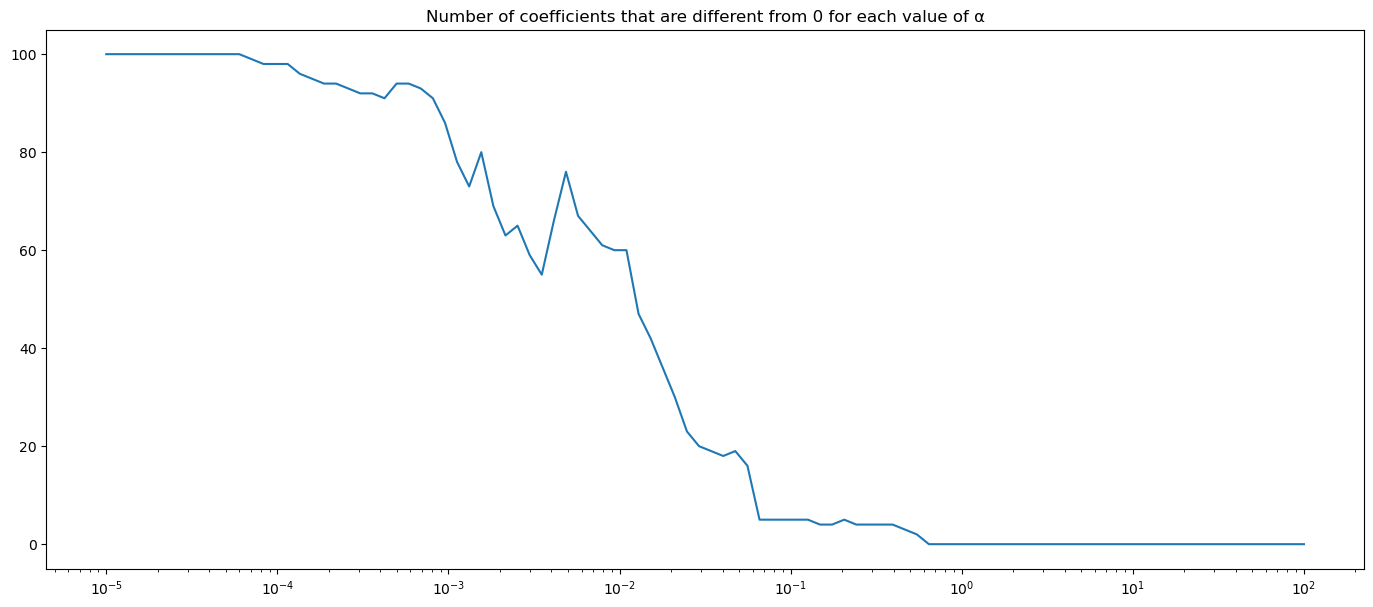

In [41]:
#(b) Plot the number of coefficients that are different from 0 for each value of α
fig = plt.figure(figsize=(17, 7))
plt.plot(alphas, num_coef_dif_zero)
plt.xscale('log')
plt.title("Number of coefficients that are different from 0 for each value of α")
plt.show()

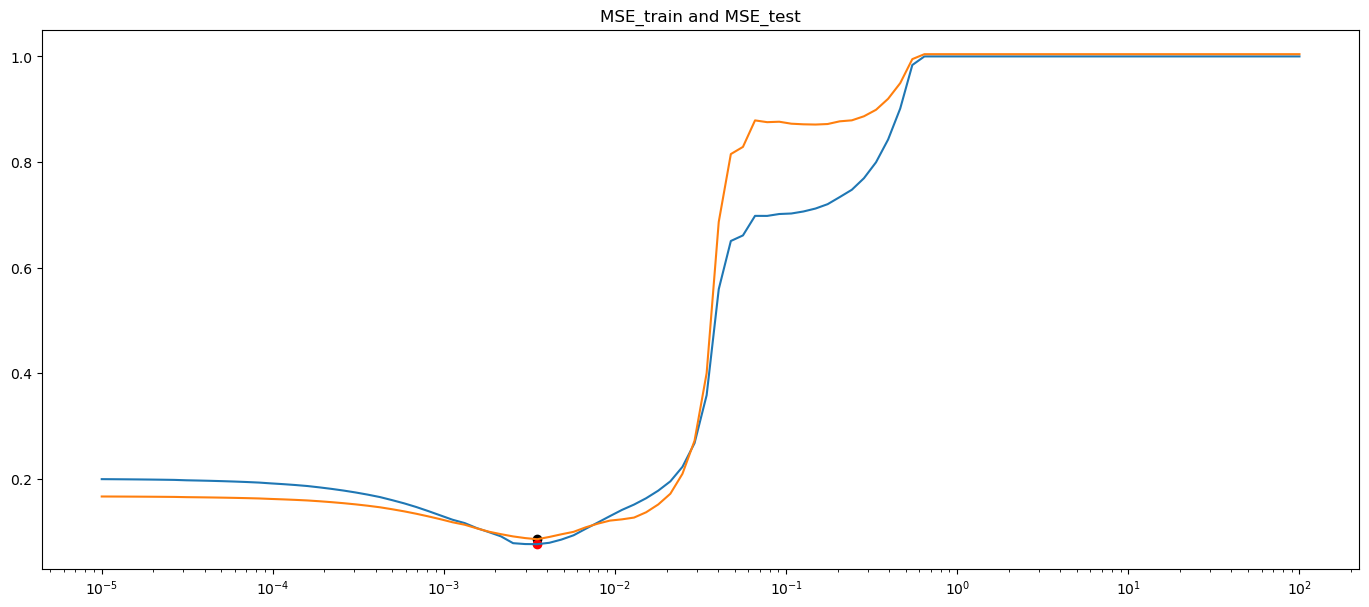

In [42]:
#(c) Plot how MSE of both the train and test sets change with α. Signal the minimum with a point
MSE_train=[]
MSE_test=[]

for alpha in alphas : 
    #print(ridge_estimator(X_train_std,y_train,alpha))
    #print(X_train_std.shape)
    model = Lasso(alpha, fit_intercept=False,max_iter=100000, tol=0.1)
    results = model.fit(X_train_std,y_train)
    lasso_coeff = model.coef_
    y_train_pred = X_train_std@lasso_coeff
    y_test_pred = X_test_std@lasso_coeff
    MSE_train.append(mean_squared_error(y_train,y_pred = y_train_pred))
    MSE_test.append(mean_squared_error(y_test,y_pred = y_test_pred))
MSE_train_min = np.argmin(MSE_train)
MSE_test_min = np.argmin(MSE_test)

fig = plt.figure(figsize=(17, 7))
plt.plot(alphas[MSE_test_min], MSE_test[MSE_test_min], marker="o", color="black")
plt.plot(alphas[MSE_train_min], MSE_train[MSE_train_min], marker="o", color="red")
plt.plot(alphas, MSE_train)
plt.plot(alphas, MSE_test)
plt.xscale('log')
plt.title("MSE_train and MSE_test")
plt.show()
    

In [43]:
#(d) For the best performing value of α on the test set
best_value_alpha = alphas[MSE_train_min]
model = Lasso(best_value_alpha, fit_intercept=False,max_iter=100000, tol=0.1)
results = model.fit(X_train_std,y_train)
lasso_coeff = model.coef_
y_test_pred_best = X_test_std@lasso_coeff
r2_best = r2_score(y_test,y_test_pred_best)

In [44]:
#Store R2
df_coef["Lasso"] = pd.Series(r2_best)

In [45]:
df_coef.head()

,OLS,Lasso
0,0.960055,0.915196


### Question 7

In [46]:
#Code your own version of the crossvalidation
def cross_val(X, y, n_splits, alpha_ridge, alpha_lasso):
    n_samples = X.shape[0]
    fold_sizes = np.full(n_splits, n_samples // n_splits)
    fold_sizes[:n_samples % n_splits] += 1
    indices = np.arange(n_samples)
    current = 0
    mse_list=[]
    for fold_size in fold_sizes:
        start, stop = current, current + fold_size
        test_idx = indices[start:stop]
        train_idx = np.concatenate((indices[:start], indices[stop:]))
        X_train, y_train = X[train_idx], y[train_idx]
        X_test, y_test = X[test_idx], y[test_idx]
        model = ElasticNet(alpha=alpha_ridge+alpha_lasso, l1_ratio=alpha_ridge/(alpha_ridge+alpha_lasso),tol=0.1, max_iter=50000)
        model.fit(X_train, y_train)
        mse = mean_squared_error(y_test, model.predict(X_test))
        mse_list.append(mse)
        current = stop
    return np.mean(mse_list)


In [47]:
n_splits = 5
alphas_ridge = np.logspace(-10, 3, num=100)
alphas_lasso = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99]

alphas_params = [(alpha_ridge,alpha_lasso) for alpha_ridge in alphas_ridge for alpha_lasso in alphas_lasso]

r2_max_alphas_params = (rid,las) = alphas_params[0]
r2_max = cross_val(X_train_std,y_train,n_splits,rid,las)

for (alpha_ridge,alpha_lasso) in alphas_params:
    r2_set = cross_val(X_train_std,y_train,n_splits,rid,las)
    if r2_max < r2_set :
        r2_max_alphas_params = (alpha_ridge,alpha_lasso)

print("The couple (α-ridge,α-lasso) that maximizes R2 is :", r2_max_alphas_params)

The couple (α-ridge,α-lasso) that maximizes R2 is : (1e-10, 0)


***
# BootStrap

## Question 8

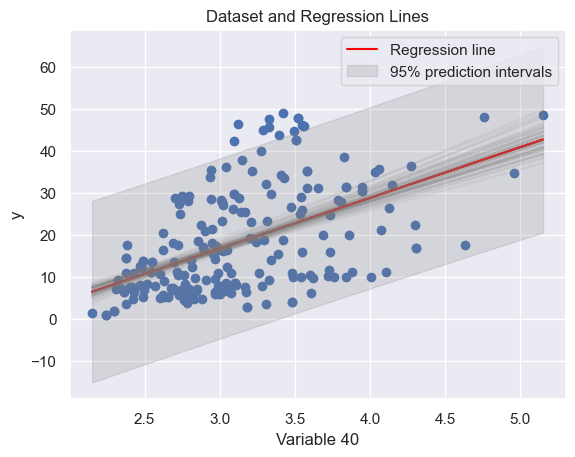

In [291]:
#For this question, we are going to use only variable 40 of the dataset original (non-centered) X. Plot the dataset and the regression line fitted with the whole sample. Generate 50 bootstrap samples, for each of the samples fit a regression model and plot the 50 estimated regression lines in the same plot (by setting alpha=.4 in the plotting function you can make the lines more transparent for the sake of readability of the plot). Finally, in the same plot, plot the prediction intervals (see exercise 12 in the lecture notes for the expression of the confidence intervals for the one dimensional case).

x_40 = X[:, 39]
model = LinearRegression().fit(x_40.reshape(-1, 1), Y)
n_bootstrap = 50
bootstrap_models = []
for i in range(n_bootstrap):
    x_bootstrap, y_bootstrap = resample(x_40, Y)
    model_bootstrap = LinearRegression(fit_intercept=True).fit(x_bootstrap.reshape(-1, 1), y_bootstrap)
    bootstrap_models.append(model_bootstrap)

fig = plt.figure(figsize=(17, 7))
plt.scatter(x_40, Y)
plt.plot(x_40, model.predict(x_40.reshape(-1, 1)), color='red', label='Regression line')

for model_bootstrap in bootstrap_models:
    plt.plot(x_40, model_bootstrap.predict(x_40.reshape(-1, 1)), color='gray', alpha=0.1)

x_range = np.linspace(x_40.min(), x_40.max(), 100).reshape(-1, 1)
y_pred = model.predict(x_range)
std_error = np.sqrt(np.sum((Y - model.predict(x_40.reshape(-1, 1))) ** 2) / (len(Y) - 2))
std_error_pred = std_error * np.sqrt(1 + 1/len(x_40) + (x_range - np.mean(x_40)) ** 2 / np.sum((X40 - np.mean(x_40)) ** 2))
std_error_pred = std_error_pred.flatten()
ci_lower = y_pred - 1.96 * std_error_pred
ci_upper = y_pred + 1.96 * std_error_pred

plt.fill_between(x_range.ravel(), ci_lower, ci_upper, color='gray', alpha=0.2, label='95% prediction intervals')

plt.xlabel('Variable 40')
plt.ylabel('y')
plt.title('Dataset and Regression Lines')
plt.legend()

plt.show()


***
# PCA

## Question 9

In [292]:
#Standardize both the training and testing sets
Std_scaler=StandardScaler()
X_std = Std_scaler.fit_transform(X)
y_std = Std_scaler.fit_transform(Y.reshape(-1,1))

In [293]:
Cov_matrix = X_std.T @ X_std / X_std.shape[0]

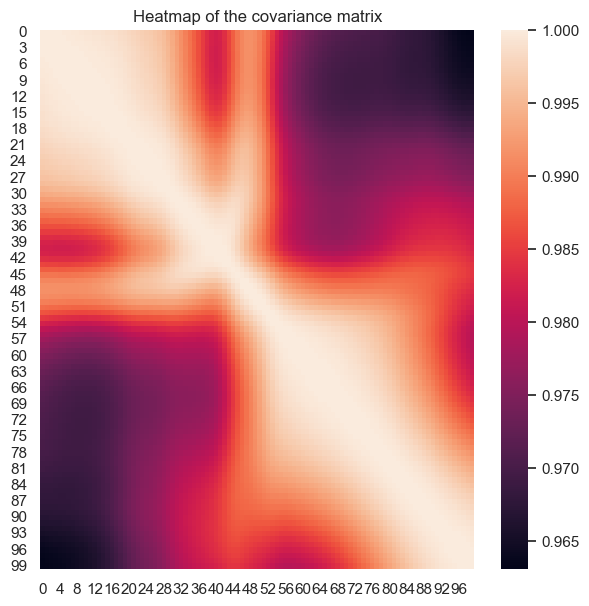

In [311]:
#(a) Plot a heatmap of the covariance matrix
fig = plt.figure(figsize=(7, 7))
sns.heatmap(Cov_matrix)
plt.title("Heatmap of the covariance matrix")
plt.show()
sns.set() # return to default seaborn parameters

In [81]:
#Compute the singular value decomposition of the covariance matrix
U, s, V = np.linalg.svd(Cov_matrix)

In [82]:
PC = X_std @ U

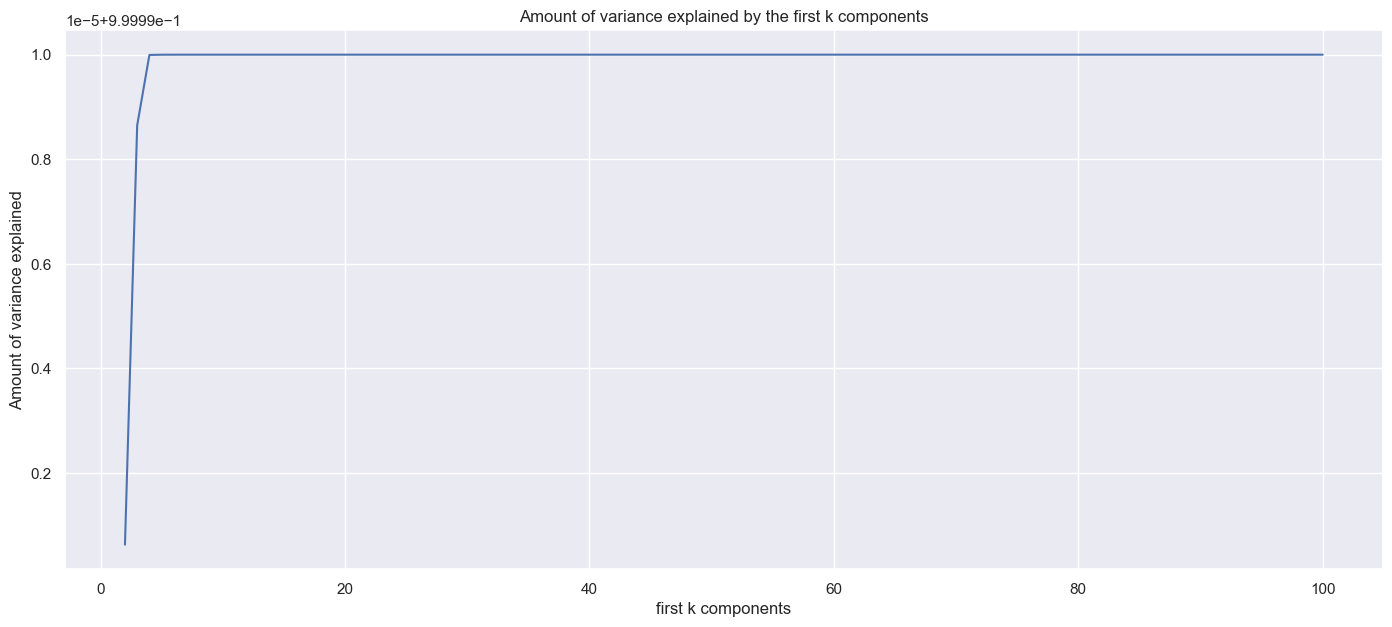

In [310]:
#(c) Plot the amount of variance explained by the first k components 
explained_var = np.cumsum(s**2)/np.sum(s**2)
fig = plt.figure(figsize=(17, 7))
plt.plot(np.arange(2,len(s)+1), explained_var[1:])
plt.title("Amount of variance explained by the first k components")
plt.xlabel("first k components")
plt.ylabel("Amount of variance explained")
plt.show()

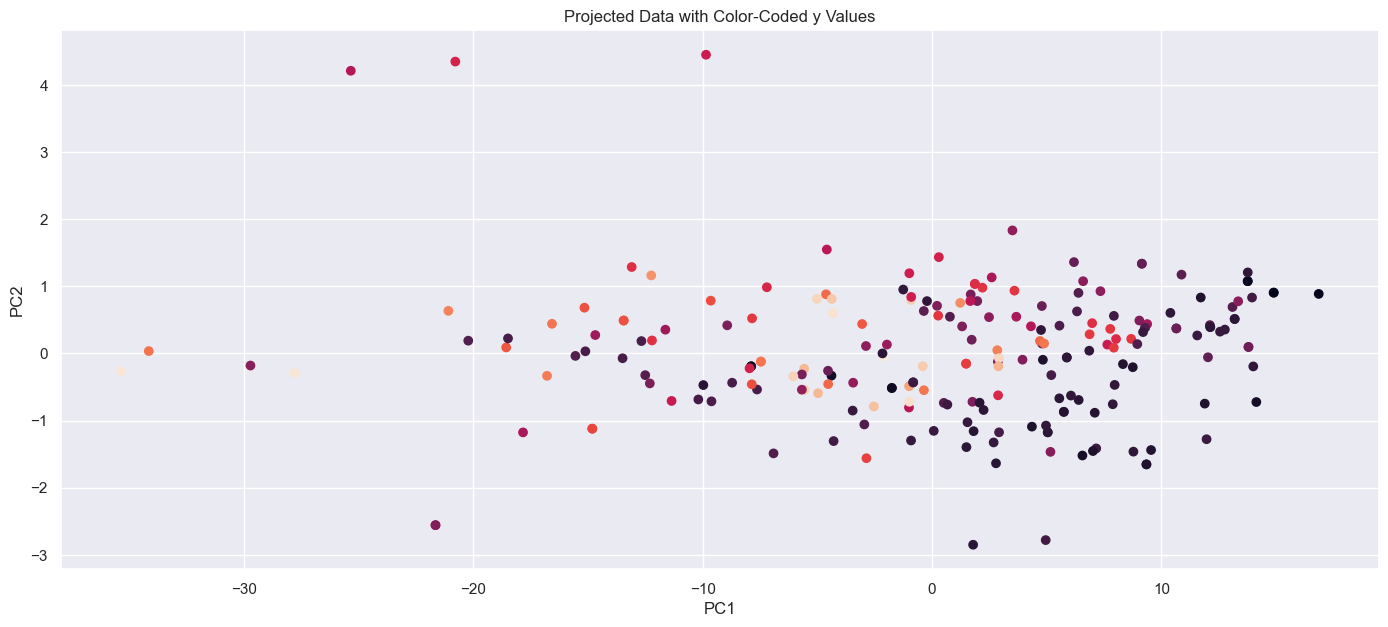

In [308]:
#(d) We will use (as an approximation) the first 2 PCs. Plot the projected data using as color the value of y and interpret the plot.
U_red = U[:,:2]
PC_red = X_std @ U_red

fig = plt.figure(figsize=(17, 7))
plt.scatter(PC_red[:, 0], PC_red[:, 1], c=y_std)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projected Data with Color-Coded y Values')
plt.show()

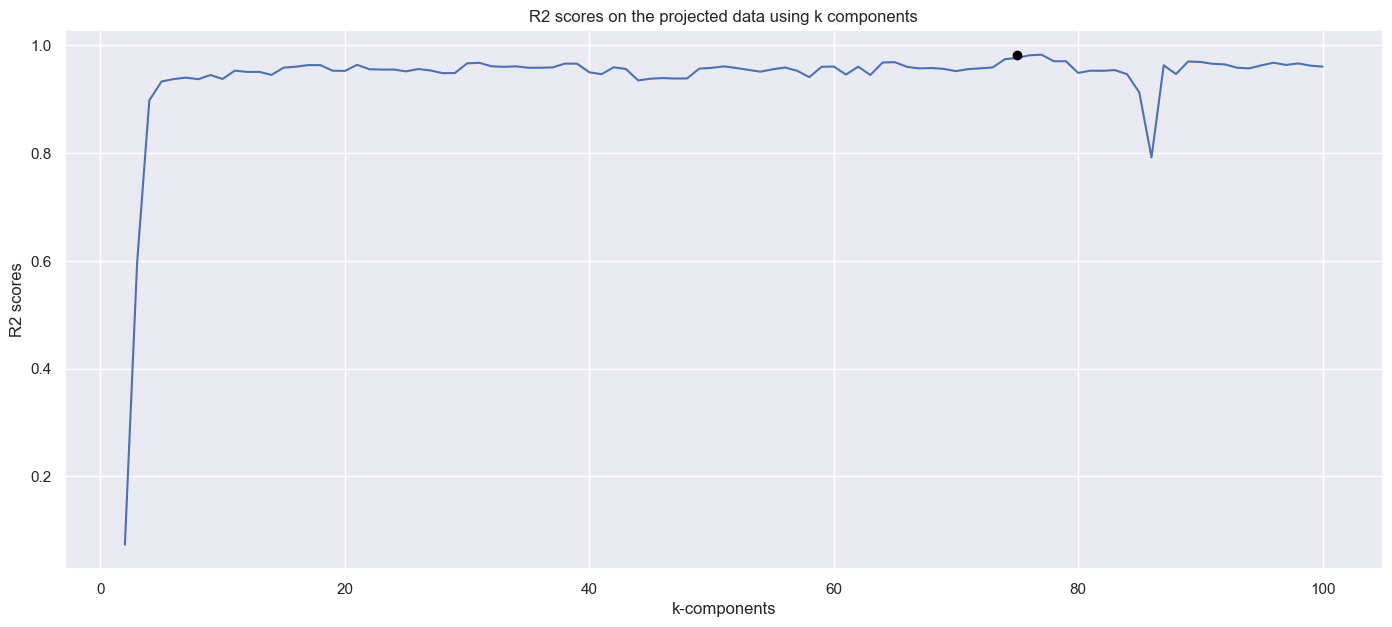

In [312]:
#(e) Run OLS on the projected data using k components for k evenly spaced in 2..p. Store the best score in the dataFrame.
n,p = X_train_std.shape
r2_scores = []

for k in range (2,p+1): 
    PCA_X_train = X_train_std @ U[:,:k]
    PCA_X_test = X_test_std @ U[:,:k]
    model = LinearRegression(fit_intercept=False)
    results = model.fit(PCA_X_train,y_train)
    model_coeff = model.coef_
    y_predicted = PCA_X_test @ model_coeff
    r2_pca, MSE_pca = r2_score(y_test, y_predicted), mean_squared_error(y_test, y_predicted)
    r2_scores.append(r2_pca)
    
r2_best = np.max(r2_scores)
r2_best_idx = np.argmax(r2_scores)

fig = plt.figure(figsize=(17, 7))
plt.plot(np.arange(2,p+1), r2_scores)
plt.xlabel('k-components')
plt.ylabel('R2 scores')
plt.plot(r2_best_idx, r2_scores[r2_best_idx], marker="o", color="black")
plt.title('R2 scores on the projected data using k components')
plt.show()
    


In [313]:
df_coef["PCA"] = pd.Series(r2_best)

In [326]:
df_coef.head()

,OLS,Sequential Feature Selector,Lasso,PCA,Ridge
0,0.960055,0.972794,0.834072,0.982209,0.982209


***
# Comparison of the models

## Question 10

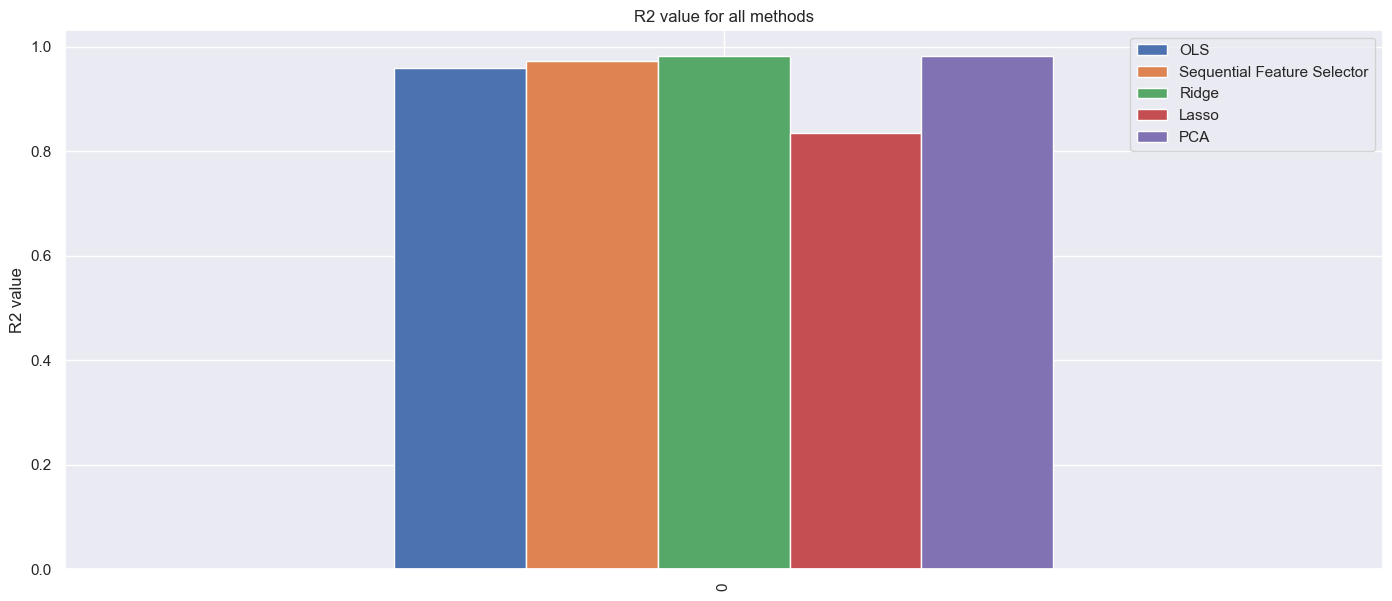

In [322]:
df_coef.plot.bar(y=["OLS", "Sequential Feature Selector", "Ridge", "Lasso", "PCA"], figsize=(17, 7))
plt.title("R2 value for all methods")
plt.ylabel("R2 value")
plt.show()

We can see that the method who has the best result for R2, which consists in having the highest R2 value, is the Ridge Method. Indeed, the regularization parameter permits to have a good modelisation of the data. 

* OLS (Ordinary Least Squares) Regression: OLS is simple to implement and interpret, but it may not be suitable for datasets with many predictors. It has the second worst result for R2, so it is not a good model for this dataframe.
* Variable Selection: Variable selection can help to simplify models and improve their predictive accuracy, but it can also result in overfitting if not done carefully. Variable Selection has a quite good R2 value, but it is not the best model for this dataframe.
* Ridge Regression: Ridge regression can improve the stability of the regression coefficients, the result is in its high R2 score.
* Cross-Validation and Elastic Net: Cross-validation and elastic net can help to improve the generalization performance of linear regression models and select the most important predictors. But it does not fit our model at all, as we can see with its bad R2 score.
* PCA (Principal Component Analysis):  PCA can help to simplify the model and reduce the number of predictors, while preserving most of the variance in the data. Then, the R2 score can be very good as it is the case with our data frame.

These models have different advantages and disadvantages, and the choice of which model to use depends on the specific characteristics of the data. Here, the best is Ridge estimator.